# Introduction to Neural Network Classification with TensorFlow
We are going to learn how to write neural networks for classification problems

* Classification problem- where you try to classify something as one thing or another
* types of classification problem:
* binary classification
* multiclass classification
* multilabel classification

In [142]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [143]:
from sklearn.datasets import make_circles

#Make 1000 example
n_sample=1000
# create circles
X, y = make_circles(n_sample,
                    noise=0.03,
                    random_state=42)


In [144]:
#check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [145]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let's visualize our data to understand it better

In [146]:
import pandas as pd
circles= pd.DataFrame({'X0':X[:,0],'X1': X[:,1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


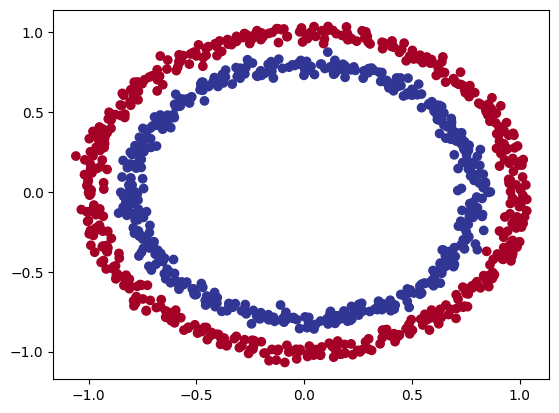

In [147]:
#visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu);

In [148]:
#check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [149]:
# How many samples are we working with
len(X), len(y)

(1000, 1000)

In [150]:
#view the first example of feature and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

# steps in Modelling

In [151]:
# set random seed
tf.random.set_seed(42)

# 1.create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2.compile
model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
# 3. fit the model
model.fit(X,y,epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.5444 - accuracy: 0.4700
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 3.8084 - accuracy: 0.4700
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8531 - accuracy: 0.4920
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.4930


In [152]:
# evaluating the model
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4970


[0.6974002718925476, 0.4970000088214874]

In [153]:
# let's try and improve our model by training it longer
model.fit(X, y, epochs=200, verbose=0)

In [154]:
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on Binary classification problem and our model is getting aroun 50% accuracy... it's performing as if it's guessing

In [155]:
#add in a extra layer
tf.random.set_seed(42)

model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_1.fit(X, y, epochs=100, verbose=0)


In [156]:
# 4. evaluate the model
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932677030563354, 0.5]

# Improve our model

In [157]:
# set random seed
tf.random.set_seed(42)

#create a model(3 layers)
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
model_2.fit(X,y,epochs=100,verbose=0)


In [158]:
#evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4980


[0.6961002945899963, 0.49799999594688416]

In [159]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())




313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


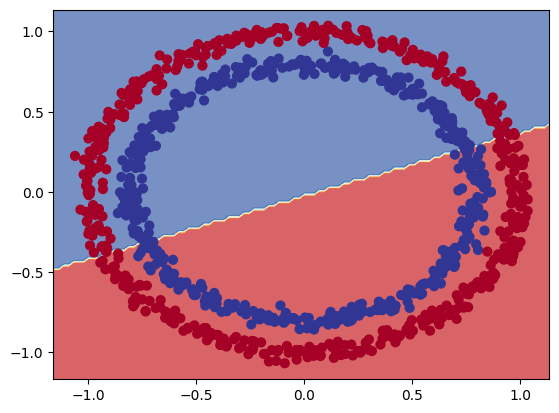

In [160]:
# checkout the predictions our model is making
plot_decision_boundary(model_2, X=X, y=y)

# the missing piece- Non Linearity

In [161]:
#set random seed
tf.random.set_seed(42)

# 1.create a model
model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear"),

])
#2.compile our model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 3.fit the model
history= model_3.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0500 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0347 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0216 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0193 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0188 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0182 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0091 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9993 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9966 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9960 - accuracy: 0.4820
Epoch 11/

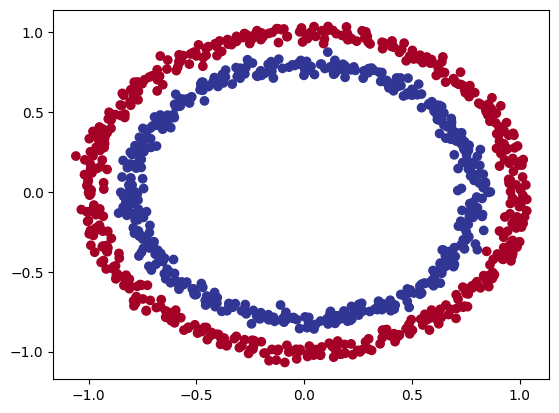

In [162]:
#check out our data
plt.scatter(X[:,0], X[:, 1],c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


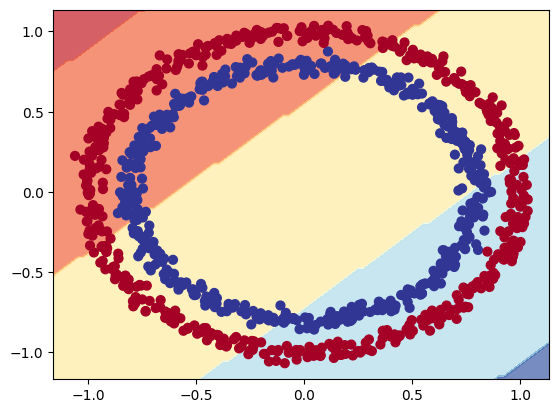

In [163]:
#check the decision boundary model for our latest model
plot_decision_boundary(model_3, X=X,y=y)

Let's build our first neural network with a non-linear activation

In [164]:
# creating another model
tf.random.set_seed(42)
# 1.create model
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])
# 2.compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3.fit the model
history= model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2998 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2661 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2120 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1865 - accuracy: 0.4690
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1144 - accuracy: 0.4670
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0576 - accuracy: 0.4670
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0158 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9378 - accuracy: 0.4650
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7689 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6197 - accuracy: 0.4690
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


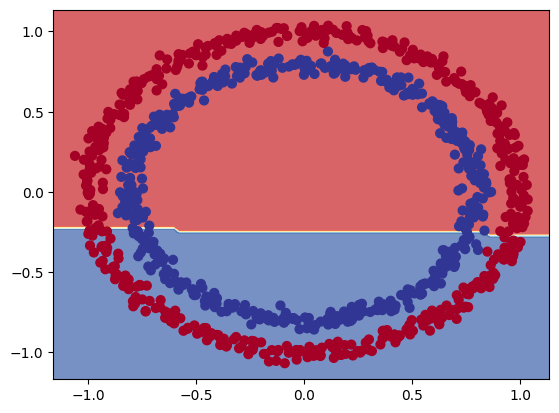

In [165]:
plot_decision_boundary(model_4, X=X, y=y)

let's increase the number of layers and number of neurons


In [166]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),

])
model_5.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])
history= model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2827 - accuracy: 0.3020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1209 - accuracy: 0.2860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0398 - accuracy: 0.2810
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9627 - accuracy: 0.2750
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8878 - accuracy: 0.2500
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8326 - accuracy: 0.2470
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7748 - accuracy: 0.2430
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6768 - accuracy: 0.2400
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6066 - accuracy: 0.2360
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5834 - accuracy: 0.2310
Epoch 11/

In [167]:
#evaluating our model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 2.4555 - accuracy: 0.2200


[2.455470561981201, 0.2199999988079071]

313/313 [==============================] - 0s 1ms/step
doing multiclass classification...


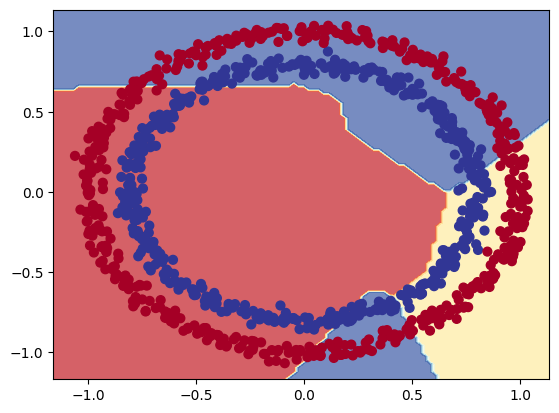

In [168]:
plot_decision_boundary(model_5, X, y)

Let's add the missing piece

In [169]:
tf.random.set_seed(42)

model_6= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history= model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 0.7035 - accuracy: 0.5050
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.4930
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4990
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4930
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4910
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4920
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4830
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4850
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4860
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4500
Epoch 11/

In [170]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1378 - accuracy: 0.9890


[0.13776470720767975, 0.9890000224113464]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


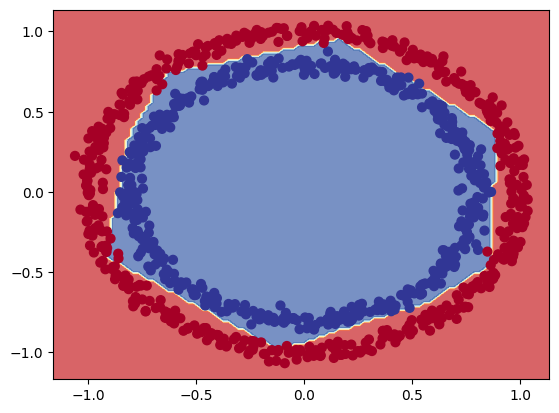

In [171]:
# Let's visualize
plot_decision_boundary(model_6, X=X, y=y)

### Now we've discussed the concepts of linear and non-linear functions(or lines), let's see them in action

In [172]:
# create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

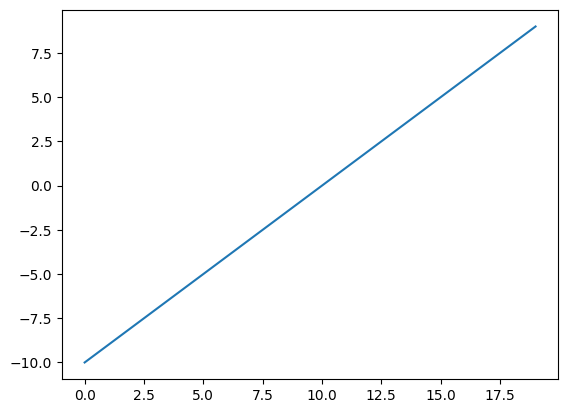

In [173]:
#visualize our toy tensor
plt.plot(A)

In [174]:
# let's start by replicating sigmoid
#  sigmoid(x)= 1 / (1 + exp(-x))
def sigmoid(x):
  return 1/(1+ tf.exp(-x))
# use the sigmoid fucntion on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

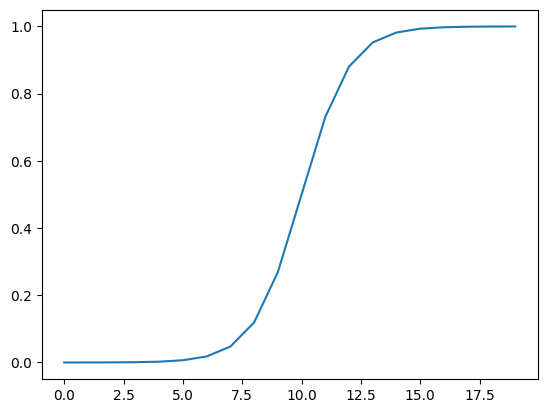

In [175]:
#Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [176]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0,x)
# pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

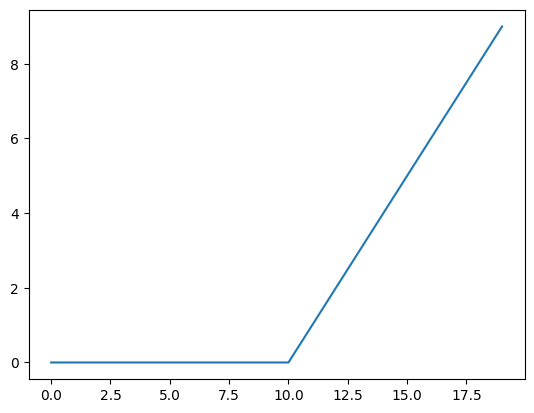

In [177]:
plt.plot(relu(A))

In [178]:
# Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [179]:
# it returns the input unmodified
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and improving our model

In [180]:
# split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [181]:
# Let's recreate the model to fit on the training data and evaluate on the test data
# set random seed
tf.random.set_seed(42)

# 1.create model
model_7= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_7.fit(X_train,y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.7016 - accuracy: 0.4712
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4875
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5188
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5575
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5813
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.6463
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.6875
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7325
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.7588
Epoch 11/25
25/25 [

In [182]:
# evaluate the model on the test dataset
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.9900


[0.08054154366254807, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


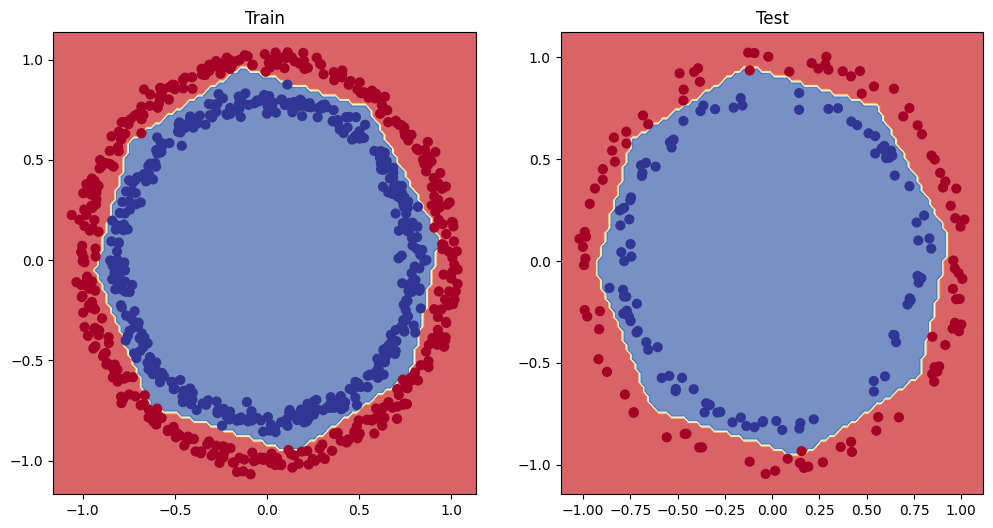

In [183]:
#plot the decision boundaries for training and test
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y= y_test)


# Plot the loss (or training) curves

In [184]:
#convert the history object into DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.701647,0.47125
1,0.693026,0.48750
2,0.688988,0.51875
3,0.684726,0.55750
4,0.677188,0.58125
5,0.665141,0.58375
6,0.647300,0.64625
7,0.629247,0.68750
8,0.595714,0.73250
9,0.555267,0.75875


Text(0.5, 1.0, 'Model_7 loss curves')

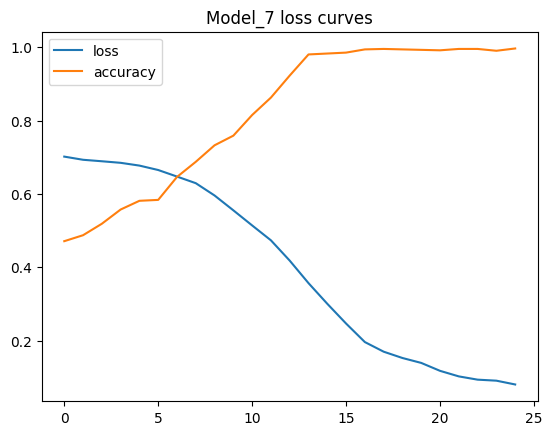

In [185]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 loss curves")

## Finding the best learning rate
to find the ideal lr- the lr where th eloss decreases during training
we are going to use the following steps:
* A learning rate **callback** - you can think of it as a extra piece of fucntionality you can add to your model while training
* Another model
* modified loss curves plot.


In [186]:
# set random seed
tf.random.set_seed(42)
# create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])
# compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
# create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model(passing lr_scheduler callback)
history_8 = model_8.fit(X_train, y_train, epochs=100,callbacks=[lr_scheduler])



Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5113 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5113 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

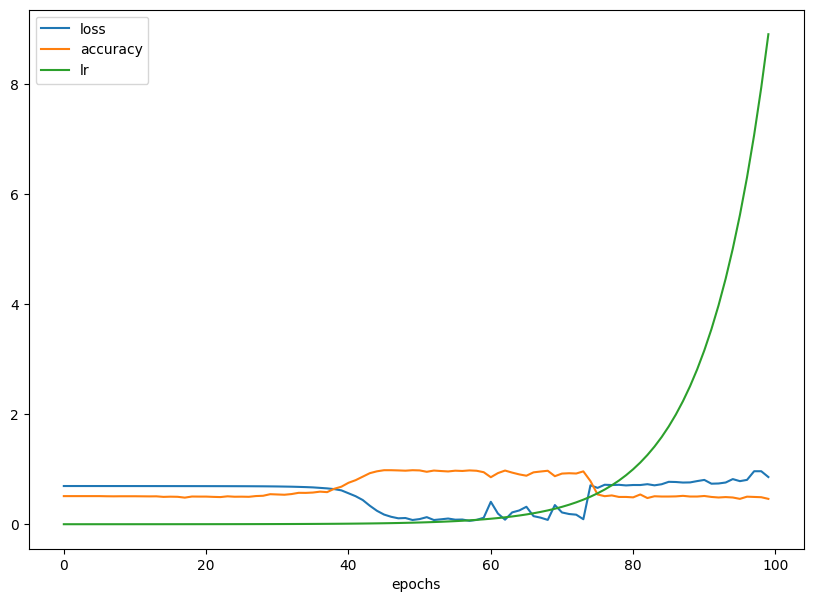

In [187]:
#checkout the history
pd.DataFrame(history_8.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

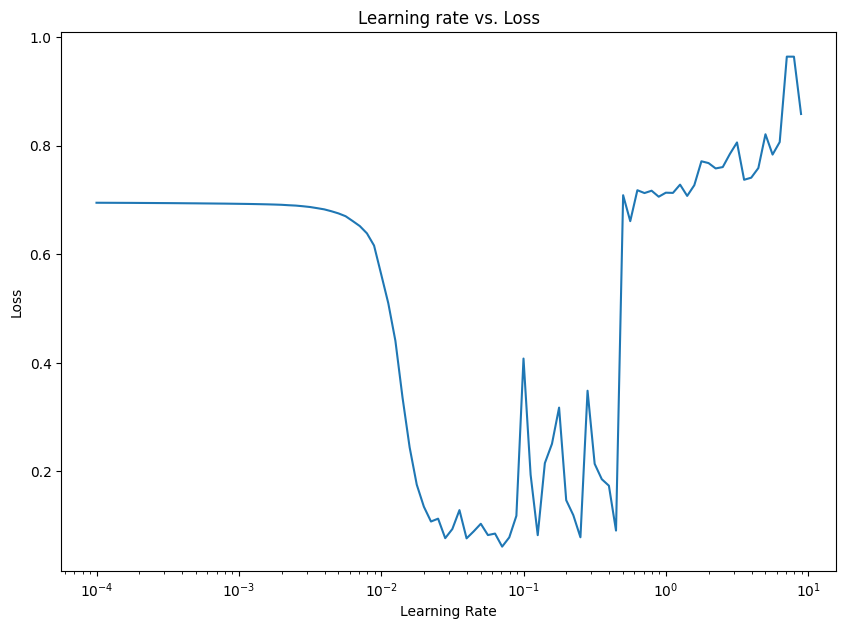

In [188]:
# plot the learning rate versus the loss
lrs= 1e-4 *(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [189]:
# Let's use ahigher 'ideal' learning rate with the same model as before
# set random seed
tf.random.set_seed(42)
#create a model
model_9= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])
# compile model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])
#lr_scheduler
#lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

#fit the model
model_9.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5412
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5913
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6587
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7550
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7912
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.8450
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8888
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.9150
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.9325
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9475
Epoch 11/50
25/25 [

In [190]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9850


[0.031894855201244354, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


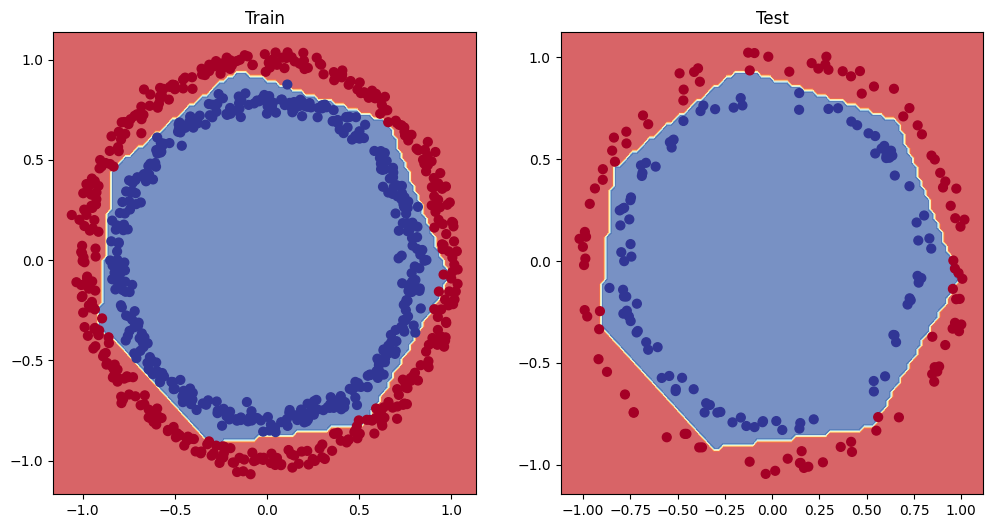

In [191]:
# plot the  decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9,X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9,X=X_test,y=y_test)
plt.show()

# Classification evaluation methods

* Accuracy -> defualt metric for classification problems. Not the best for imbalanced classes.

* Precision -> higher precision leads to less false positives

* Recall -> higher recall leads to less false negatives

* F1_score -> combination of precision and recall, usually a good overall metric for a classfication model.

* Confusion matrix -> when comparing predictions to truth labels to see where model gets confused. it can be hard to use with large numbers of classes

In [192]:
#check the accuracy of our model
loss, accuracy=model_9.evaluate (X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}")

7/7 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9850
Model loss on the test set: 0.031894855201244354
Model accuracy on test set: 98.50


Confusion matrix

In [193]:
from sklearn.metrics import confusion_matrix

#make predictions
y_preds= model_9.predict(X_test)

#create comfusion matrix
#confusion_matrix(y_test,y_preds)




7/7 [==============================] - 0s 2ms/step


In [194]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[9.9339426e-01],
        [9.9339426e-01],
        [9.9339426e-01],
        [9.9339426e-01],
        [3.9827817e-05],
        [3.5368634e-04],
        [9.9339426e-01],
        [7.5097359e-09],
        [9.9339426e-01],
        [6.9062284e-04]], dtype=float32))

In [195]:
tf.math.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [196]:
# create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[98,  3],
       [ 0, 99]])

## prettify the confusion matrix

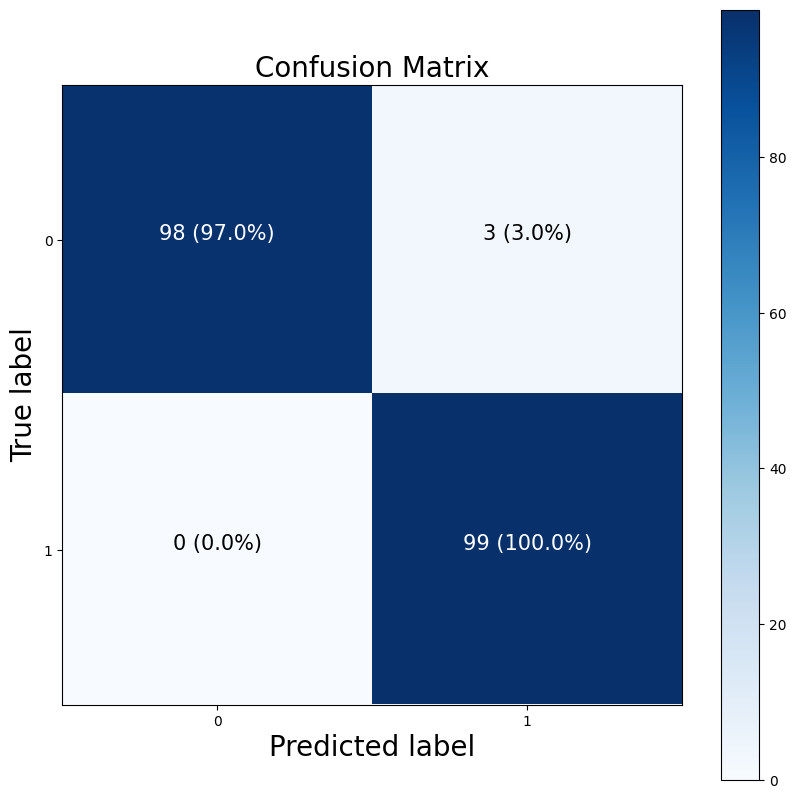

In [197]:
# the code for confusion matrix we will be writing is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)



In [198]:
cm_norm

array([[0.97029703, 0.02970297],
       [0.        , 1.        ]])

In [199]:
cm.shape[0]

2

## working with a larger example (Multiclass classification)

when you have more than two classes as option, it's known as multi-class classification

to understand this concept, we're going to build a neural network to classify images of different items of clothing.

In [200]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [201]:
# show the first training example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [202]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

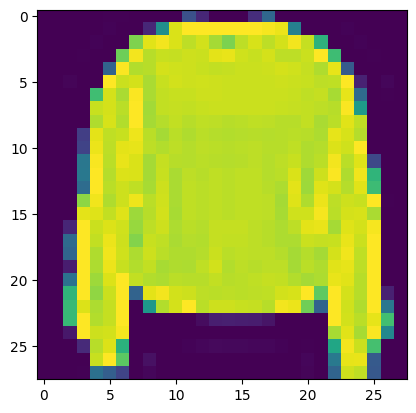

In [203]:
 #plot a single sample
 import matplotlib.pyplot as plt
 plt.imshow(train_data[7])

In [204]:
# check out sample label
train_labels[0]

9

In [205]:
# create a small list so we can index onto our training labels so they're human- readable
class_names= ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt')

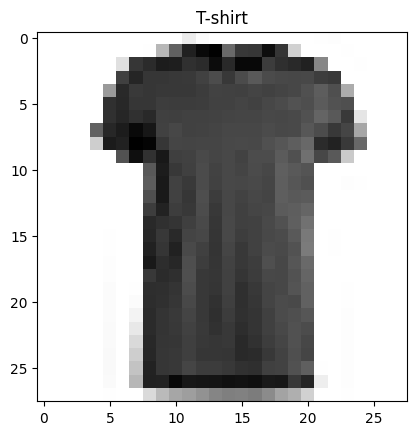

In [206]:
# plot an example image and it's label
index_of_choice=10
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


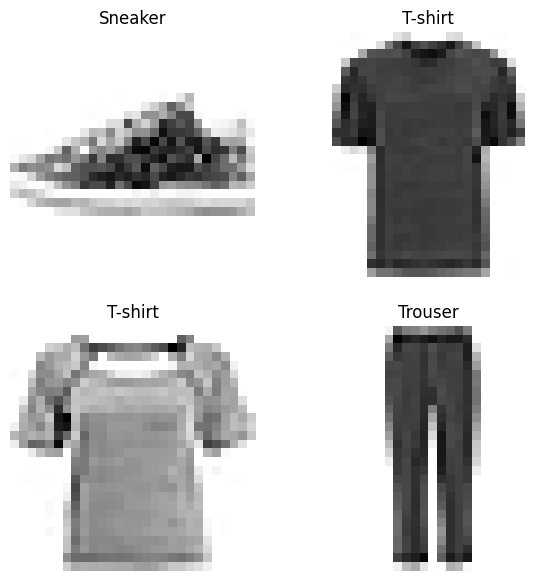

In [207]:
# plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index= random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

 ## building a multiclass classification model
 important changes in our model:
 * Input shape =28x28(shape of one shape)
 * Output shape= 10 (one per class of clothing)
 * Loss function= tf.keras.losses.CategoricalCrossentropy()
 * Output layer activation= Softmax(not sigmoid)

 * *Note:* Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation.
 If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss


In [208]:
# our data needs to be flattened (from 28x28 to none,784)
flatten_model= tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [209]:
# set random seed
tf.random.set_seed(42)
#create a model
model_10 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])

# compile model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 #Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation.
                 #If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fir the model
non_norm_history= model_10.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3913 - accuracy: 0.0991 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3031 - val_accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3031 - val_accuracy:

In [210]:
# check the model summary
model_10.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_62 (Dense)            (None, 4)                 3140      
                                                                 
 dense_63 (Dense)            (None, 4)                 20        
                                                                 
 dense_64 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [211]:
# check the min and max values of the train_data
train_data.min(), train_data.max()

(0, 255)

neural networks prefer data to be scaled(normalized) i.e to have the numbers in terms of 0 and 1

In [212]:
# we can set our training and testing data b/w 0 & 1 by dividing by the maximum
train_data_norm= train_data/ 255.
test_data_norm= test_data/255.

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [213]:
# now the data has been normalized, let's build a model to fin patterns in it

#set random seed
tf.random.set_seed(42)

# create a model
model_11= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# fit the model
norm_history= model_11.fit(train_data_norm, train_labels,epochs=10, validation_data=(test_data_norm, test_labels))



Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2953 - accuracy: 0.5637 - val_loss: 0.9343 - val_accuracy: 0.6829
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8385 - accuracy: 0.7213 - val_loss: 0.7976 - val_accuracy: 0.7318
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7477 - accuracy: 0.7473 - val_loss: 0.7396 - val_accuracy: 0.7507
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7007 - accuracy: 0.7623 - val_loss: 0.7008 - val_accuracy: 0.7646
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6699 - accuracy: 0.7720 - val_loss: 0.6779 - val_accuracy: 0.7707
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6435 - accuracy: 0.7808 - val_loss: 0.6571 - val_accuracy: 0.7792
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6227 - accuracy: 0.7875 - val_loss: 0.6418 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/ normalized(numbers between 0 and 1)

<Axes: title={'center': 'Normalized data'}>

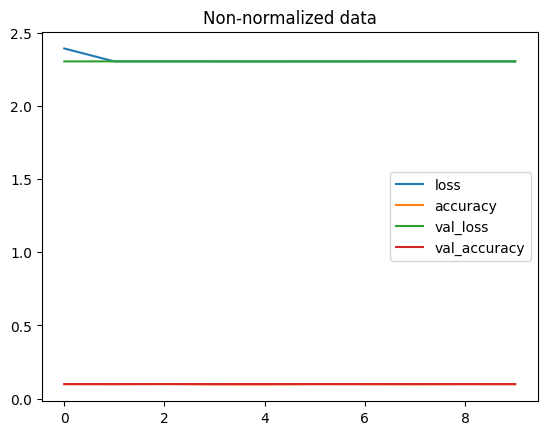

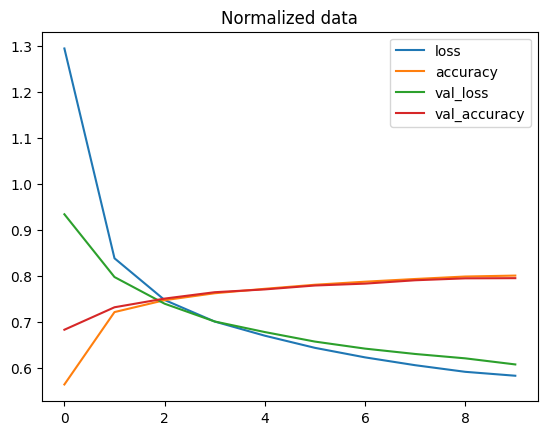

In [214]:
import pandas as pd
#plot non-mormalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")


**note:** the same model wiht *slightly* differen data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

# Finding the ideal learning rate

In [215]:
# set random seed
tf.random.set_seed(42)

# create a model
model_12= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
# compile model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# create a learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10 **(epoch/20))

#fit the model
find_lr_history= model_12.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm,test_labels),
                              callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6643 - accuracy: 0.3368 - val_loss: 1.4128 - val_accuracy: 0.4362 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2417 - accuracy: 0.5192 - val_loss: 0.9990 - val_accuracy: 0.5979 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9031 - accuracy: 0.6464 - val_loss: 0.8979 - val_accuracy: 0.6412 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8257 - accuracy: 0.6822 - val_loss: 0.7788 - val_accuracy: 0.7170 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6738 - accuracy: 0.7552 - val_loss: 0.6629 - val_accuracy: 0.7646 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6325 - accuracy: 0.7710 - val_loss: 0.6679 - val_accuracy: 0.7605 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal Learning rate')

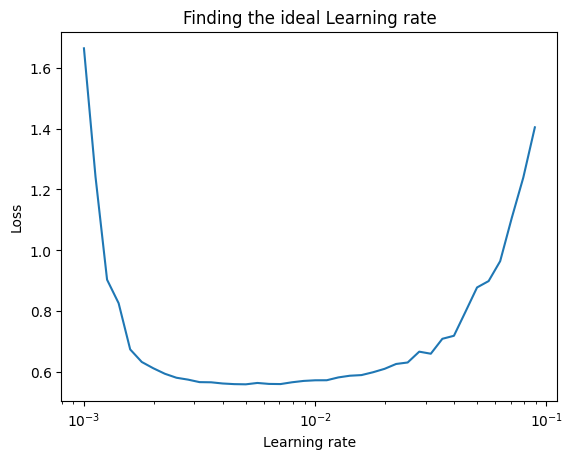

In [216]:
# plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs= 1e-3 *(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning rate")



In [217]:
10**-3 #is the ideal rate

0.001

In [218]:
# Let's refit the model with ideal lr
# set random seed
tf.random.set_seed(42)

# create a model
model_13= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
# compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

#fit the model
history_13= model_13.fit(train_data_norm,
                         train_labels,
                         epochs=20,
                         validation_data=(test_data_norm,test_labels))




Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1717 - accuracy: 0.5501 - val_loss: 0.8167 - val_accuracy: 0.6820
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7253 - accuracy: 0.7319 - val_loss: 0.6833 - val_accuracy: 0.7533
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6203 - accuracy: 0.7773 - val_loss: 0.6246 - val_accuracy: 0.7752
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5841 - accuracy: 0.7958 - val_loss: 0.6059 - val_accuracy: 0.7830
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5650 - accuracy: 0.8046 - val_loss: 0.6082 - val_accuracy: 0.7890
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5518 - accuracy: 0.8098 - val_loss: 0.5820 - val_accuracy: 0.8015
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5435 - accuracy: 0.8138 - val_loss: 0.5662 - val_accuracy:

# evaluating our multi-class classification model

we can take the following steps:
* Evaluate our multi-class classification metrics(such as a confusion matrix)
* Asses some of its predictions(through visualizations)
* improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's gro through the top 2.....


## Creating a function for confusion matirx

In [219]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

 # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)



In [220]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [221]:
# make some predictions with our model
y_probs= model_13.predict(test_data) # probs= prdiction probabilities
# view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.99999994, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.99999994, 0.        , 0.        , 0.        ]],
      dtype=float32)

In [222]:
test_data[:10], test_data_norm[:10]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [223]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [224]:
# convert all of the prediction probabilities into integers
y_preds= y_probs.argmax(axis=1)
# view first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 8, 7])

In [225]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [226]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true= test_labels,
                 y_pred=y_preds)


array([[575,   0,   9,  48,  61,   0, 264,   0,  37,   6],
       [  1, 940,   0,  16,  40,   0,   0,   0,   3,   0],
       [  5,   0, 267,   4, 594,   0,  67,   0,  63,   0],
       [ 26,  17,   2, 691, 188,   0,  44,   0,  29,   3],
       [  0,   0,  11,   3, 961,   0,  16,   0,   9,   0],
       [  0,   1,   0,   0,   0, 391,   0,  46, 364, 198],
       [ 76,   2,  33,  22, 495,   1, 312,   0,  56,   3],
       [  0,   0,   0,   0,   0,   2,   0, 755,   1, 242],
       [  0,   1,  12,   7,   9,   0,   7,   3, 958,   3],
       [  1,   0,   0,   0,   0,   0,   0,   7,   9, 983]])

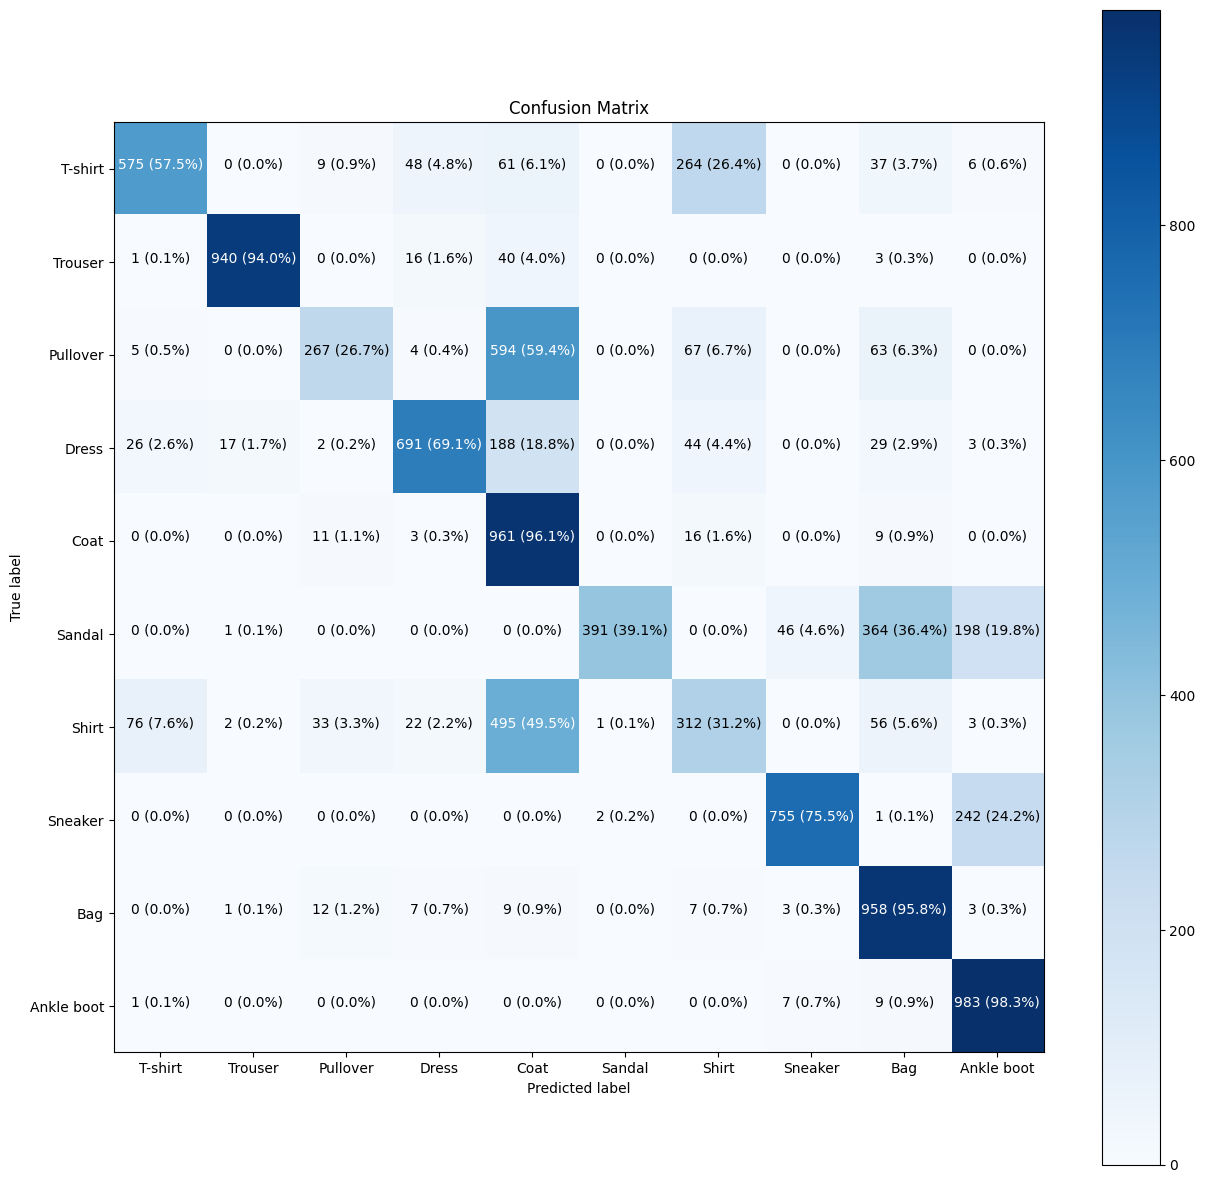

In [227]:
# make a prettier confusion matrix
make_confusion_matrix(y_true= test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10
                      )

**note:** often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

let's create a function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [228]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image, plots it and labels it with a prediction and truth label
  """
  #set up random integer
  i= random.randint(0, len(images))

  # create predictions and targets
  target_image= images[i]
  pred_probs= model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image, cmap= plt.cm.binary)

  #change the color of the titles depending on the prediction(right or wrong)
  if pred_label== true_label:
    color = "green"
  else:
    color="red"
  # add xlabel information (prediction/true label)
  plt.xlabel("Pred:{} {:2.0f}% (True:{})". format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_labels),
             color=color)  # set the color to green or red based on if prediction is right or wrong



1/1 [==============================] - 0s 22ms/step


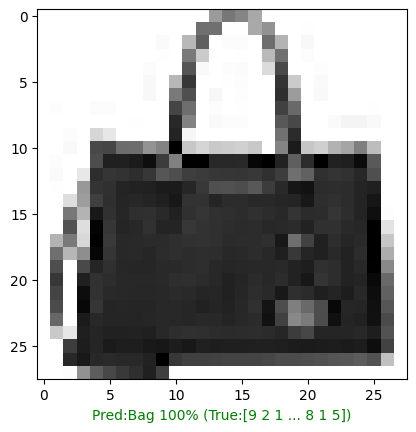

In [229]:
# check out a random image as well  as it's prediction
plot_random_image(model=model_13,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning?

In [230]:
# find the layers of our most recent model
model_13.layers

In [231]:
# extract a particular layer
model_13.layers[1]

In [232]:
# get the patterns of a layer in our network
weights, biases= model_13.layers[1].get_weights()
#shapes
weights, weights.shape

(array([[ 0.94821167,  0.37656495, -1.0610211 ,  0.0094411 ],
        [ 0.2022381 ,  0.2855967 ,  0.20064579, -1.3636905 ],
        [ 0.9112405 , -0.12349277, -0.8770035 , -0.40265226],
        ...,
        [ 0.02421073,  0.10587302, -0.390104  ,  0.12470812],
        [-0.10116447, -0.575836  , -0.846562  ,  0.10048316],
        [ 0.5137139 ,  0.31788626, -0.5204518 , -0.02418855]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector

In [233]:
#Bias and biases shapes
biases, biases.shape


(array([0.38749307, 0.6183165 , 0.95928967, 0.6131327 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.
The bias vector gets initialized as zeros (at least in the case of a Tensorflow Dense Layer).

the bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [234]:
model_13.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 4)                 3140      
                                                                 
 dense_72 (Dense)            (None, 4)                 20        
                                                                 
 dense_73 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


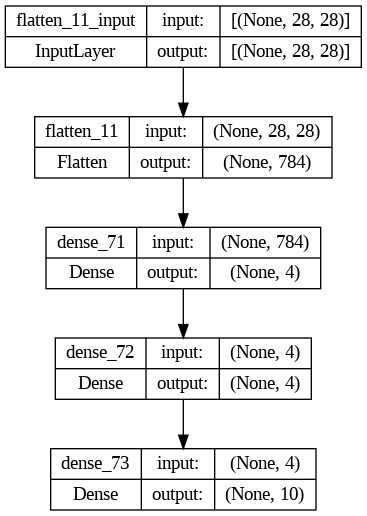

In [235]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
#see the inputs and outputs of each layer
plot_model(model_13,show_shapes=True)